In [72]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from tqdm import tqdm_notebook
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
batch_size=32
out_class = 10

In [124]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle = False)
len(trainloader),len(testloader)

Files already downloaded and verified
Files already downloaded and verified


(1563, 2500)

In [0]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [126]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(images.shape)
print(images[0].shape,labels[0].item())

torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32]) 7


In [77]:
npimg = images[0].numpy()
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


In [0]:
def imshow(img):
  plt.figure(figsize=(5,5))
  plt.axis('off')
  img = np.transpose(img.numpy(),(1,2,0))
  plt.imshow(img)
  plt.show()

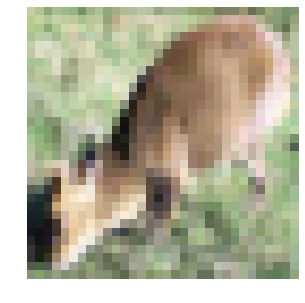

In [79]:
imshow(images[0])

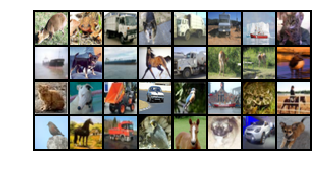

In [80]:
imshow(torchvision.utils.make_grid(images))

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5),    #(N,3,32,32) -> (N,6,)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2)
        )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
    
    
  def forward(self,x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.size(0),-1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x
      

In [107]:
net = LeNet()
out = net(images)
print(type(out),type(out.data))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [0]:
import copy
bm = copy.deepcopy(net)
bm(images.to(device))
loss_fn(bm(images.to(device)),labels.to(device))

In [0]:
a,b = torch.max(out.data,1)
out,a,b

In [0]:
def evaluation(dataloader,model):
  total, correct = 0,0
  model.to(device)
  for data in tqdm_notebook(dataloader,total=len(dataloader),unit='batch'):
    images,labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    value,index =torch.max(outputs,1)
    
    
    total += labels.size(0)
    correct += (index==labels).sum().item()
    del images,labels,outputs
    
  return 100*(correct/total)
    
    
    

In [0]:
loss_fn = nn.CrossEntropyLoss()

opt = optim.Adam(net.parameters())

tensor(1.0508, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6123, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.8449, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.8862, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6761, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4414, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4414, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2756, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2756, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(1.2657, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.9252, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.9427, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4118, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5260, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6769, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6740, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4381, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5951, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6547, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.6146, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.3874, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5681, device='cuda:0', grad_fn=<NllLossBackward>)


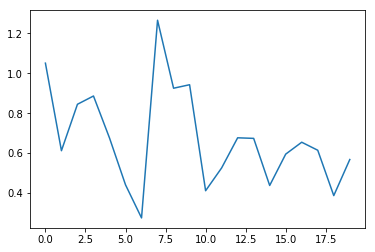

tensor(0.2842, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5600, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4272, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.3709, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2301, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2301, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.3087, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.7178, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2876, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(1.2449, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5589, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.9223, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2315, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(1.0293, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.2290, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2290, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.5124, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.7095, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4483, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.4606, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward>)


tensor(0.1124, device='cuda:0', grad_fn=<NllLossBackward>)


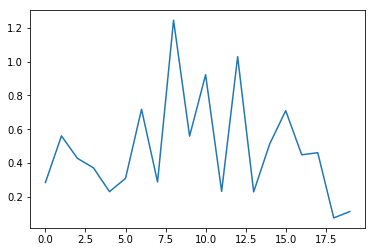

In [133]:
loss_arr=[]
max_epochs=20
#net.to(device)
#min_loss = loss_fn(net(images.to(device)),labels.to(device))
for epoch in tqdm_notebook(range(max_epochs), total=max_epochs, unit='epoch'):
  for data in tqdm_notebook(trainloader, total=len(trainloader), unit='batch'):
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    opt.zero_grad()
    
    outputs = net(images)
    
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    del images,labels,outputs
  if min_loss > loss:
    min_loss = loss
    print(min_loss)
    best_model = copy.deepcopy(net)
  print(loss)
  loss_arr.append(loss)
    
    
    
    
plt.plot(loss_arr)

plt.show()

In [128]:
min_loss

tensor(0.5344, device='cuda:0', grad_fn=<NllLossBackward>)

In [134]:
evaluation(trainloader,net)

87.212